In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [21]:
data = np.load("../datasets/mnist/mnist_train_small.npy")

In [22]:
X, y = data[:, 1:], data[:, :1]

In [34]:
y_oe = (y % 2) == 0

In [23]:
y.shape

(19999, 1)

In [24]:
ohe = OneHotEncoder()

In [25]:
y_hot = ohe.fit_transform(y).todense()

In [36]:
y_oe_hot = ohe.fit_transform(y_oe).todense()

In [38]:
y_oe[:10]

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True]])

In [39]:
y_oe_hot[:10]

matrix([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [29]:
X_train.shape

(13399, 784)

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [33]:
input_layer = Input(shape=(784,))
d1 = Dense(units=400, activation="sigmoid", name="d1")(input_layer)
d2 = Dense(units=200, activation="sigmoid", name="d2")(d1)
d3 = Dense(units=100, activation="sigmoid", name="d3")(d2)
d41 = Dense(units=50, activation="sigmoid", name="d41")(d3)
d42 = Dense(units=50, activation="sigmoid", name="d42")(d3)
out1 = Dense(units=10, activation="sigmoid", name="out1")(d41)
out2 = Dense(units=2, activation="sigmoid", name="out2")(d42)

model = Model(inputs=[input_layer], outputs=[out1, out2])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
d1 (Dense)                      (None, 400)          314000      input_6[0][0]                    
__________________________________________________________________________________________________
d2 (Dense)                      (None, 200)          80200       d1[0][0]                         
__________________________________________________________________________________________________
d3 (Dense)                      (None, 100)          20100       d2[0][0]                         
____________________________________________________________________________________________

In [18]:
model.compile(optimizer='adam',loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
model.fit(x=X_train,
    y=[y_train, ,
    batch_size=100,
    epochs=10,
    )

Train on 13399 samples
Epoch 1/10
13399/13399 [==============================] - 5s 398us/sample - loss: 1.1709 - accuracy: 0.7077
Epoch 2/10
13399/13399 [==============================] - 3s 252us/sample - loss: 0.4436 - accuracy: 0.8907
Epoch 3/10
13399/13399 [==============================] - 3s 222us/sample - loss: 0.3287 - accuracy: 0.9131
Epoch 4/10
13399/13399 [==============================] - 4s 303us/sample - loss: 0.2896 - accuracy: 0.9175
Epoch 5/10
13399/13399 [==============================] - 4s 267us/sample - loss: 0.2751 - accuracy: 0.9207
Epoch 6/10
13399/13399 [==============================] - 3s 217us/sample - loss: 0.2577 - accuracy: 0.9244
Epoch 7/10
13399/13399 [==============================] - 4s 321us/sample - loss: 0.2548 - accuracy: 0.9258
Epoch 8/10
13399/13399 [==============================] - 4s 326us/sample - loss: 0.2443 - accuracy: 0.9257
Epoch 9/10
13399/13399 [==============================] - 4s 295us/sample - loss: 0.2255 - accuracy: 0.9321
Epoch

In [55]:
model.evaluate(x=X_test,
    y=y_test,
    batch_size=2000,
    verbose=0)

[0.25619445515401434, 0.92]

In [61]:
result = model.predict(X_test[:5])

In [62]:
result.argmax(axis=1)

array([2, 7, 0, 9, 4])

In [64]:
y_test[:5].argmax(axis=1)

matrix([[7],
        [7],
        [0],
        [9],
        [4]])

Text(0.5, 1.0, '[[7 0 4 2 9 6 1 8 3 5]]')

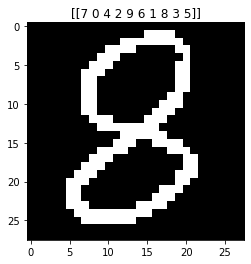

In [162]:
from PIL import Image
im = Image.open("../datasets/nums/eight.jpeg")
im = im.resize((28, 28))
img = np.array(im)
img_gray = (255 - img.mean(axis=2))
fin_img = (img_gray > 130).astype(int) * 255

plt.imshow(fin_img, cmap="gray")

output = model.predict(fin_img.reshape(1, 784)).argsort(axis=1)

plt.imshow(fin_img, cmap="gray")
plt.title(str(output))

In [117]:
X.min()

0

In [163]:
fours = X[y.flatten()==8]

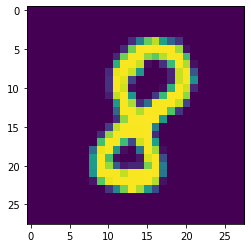

In [165]:
plt.imshow(fours[100].reshape(28, 28))